# Radiative excitation / de-excitation

- formula:
  - photoexcitation: [Tasitsiomi 2006](https://doi.org/10.1086%2F504460) (cross-sections)
  - photo-de-excitation: [Tasitsiomi 2006](https://doi.org/10.1086%2F504460) (cross-sections)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [2]:
elements = [
    lss.O1Inasan(),
]
"""
13S3S - fast level
12P1D4 - 
"""
elements[0].keys = elements[0].all_keys
# elements[0].keys = ["12P3P4", "12P1D4", "13S3S"]
# elements[0].keys = ["12P3P4", "13S3S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
population_nlte_1[0] = 1.0

count = int(10)
temperatures = np.linspace(1.0e1, 1.0e10, num=count)
electron_temperatures = np.linspace(1.0e1, 1.0e10, num=count)
electron_number_densities = np.linspace(1.0e1, 1.0e10, num=count)
optical_depth = 0.0

delta_time = 0.01

In [3]:
lss.se_nist_o1_rates(elements)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.49507000e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.78210000e-02, 1.26000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.43138359e+06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [4]:
lss.pe_tasitsiomi_rates(
    elements,
    lss.SunGueymard.wavelengths,
    lss.SunGueymard.spectral_flux_density,
    optical_depth,
    1.0e1,
)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.83337031e+17,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.14205345e+19, -2.18087769e+23,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.78369511e+30, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00]])

In [5]:
re_balance = ["pe_tasitsiomi"]
# re_balance = ["se_nist_o1", "pe_tasitsiomi"]

b_factors = calculate_b_factors(
    elements=elements,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=temperatures,
    electron_number_densities=electron_number_densities,
    optical_depth=optical_depth,
    delta_time=delta_time,
    transitions_types=[
        *re_balance,
    ]
)

/home/deverte/Projects/progs/astro/nlte/tests/utils.py:128: RuntimeWarning: invalid value encountered in divide
  b_factors[i] = population_nlte_2 / population_lte


/tmp/ipykernel_103111/688775029.py:5: RuntimeWarning: divide by zero encountered in log10
  np.log10(b_factors.T[i]),


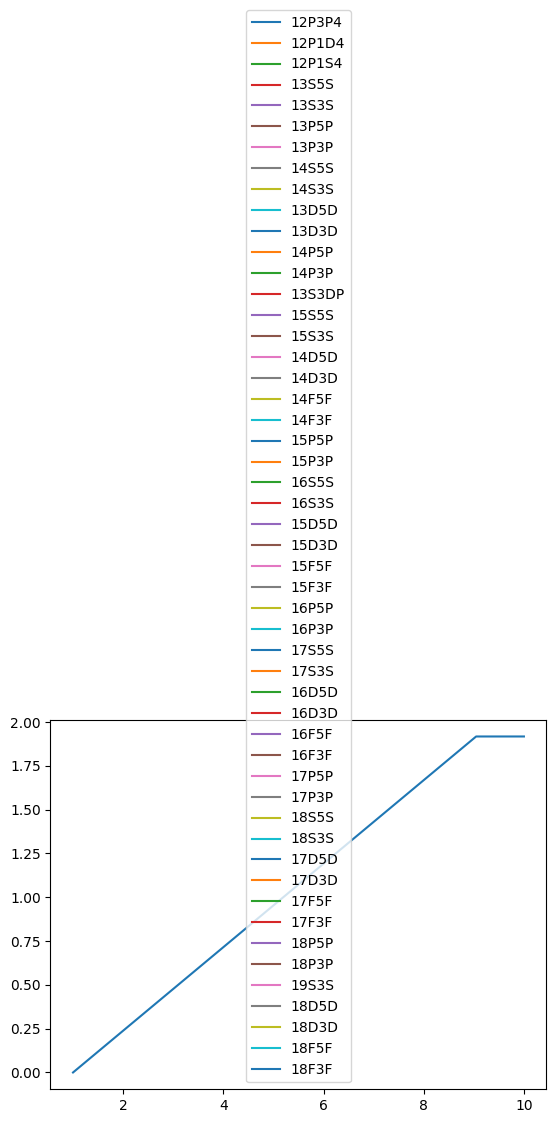

In [6]:
for element in elements:
    for i, key in enumerate(element.keys):
        plt.plot(
            np.log10(temperatures),
            np.log10(b_factors.T[i]),
            label=key,
        )
plt.legend()
plt.show()